# Grover Search Algorithm
Design for qiskit version 1.2.0

Author: Matías Hernández Serrano
 
Version: 1.0.0

Date: 27-01-2025

This code is based on the Qiskit implementation of the Grover Search Algorithm. It uses gatesUPCT.py to 
define the gates needed for the algorithm. The user has to design the topology or can use his own topology.


In [1]:
from gatesUPCT import *

First we have to create a topology for the algorithm

If you have a previous topology, you can use it later

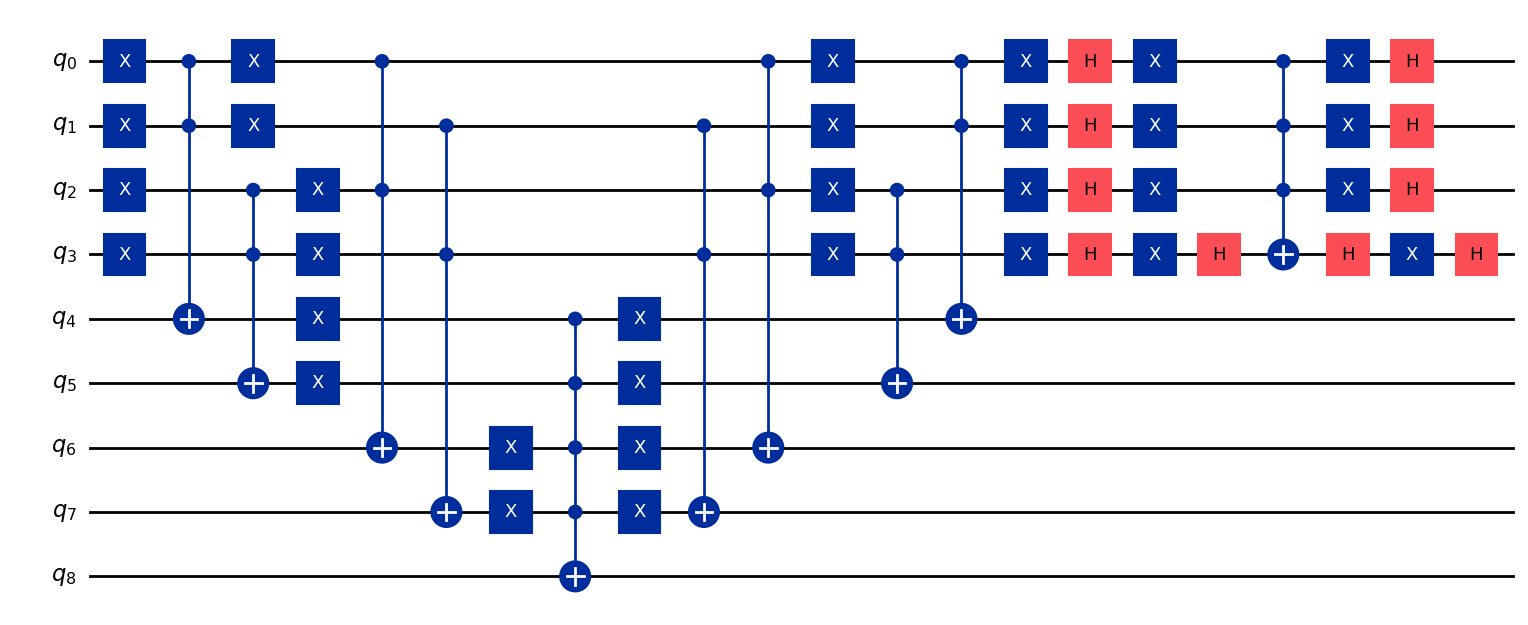

In [ ]:
# User variables
nodes = 2
edges = [(0, 1)]
colors = 2

oracle = oracle_creator_Grover(nodes, edges, colors, use_extendedEdges=False)
oracle.draw(output='mpl')


n is the number of qubits of the oracle, without the ancilla qubits.

m is the number of solutions, it can be obtained using the Quantum Counting Algorithm.

Use the Quantum_Counting.ipynb in case you want to obtain the number of solutions with your oracle.

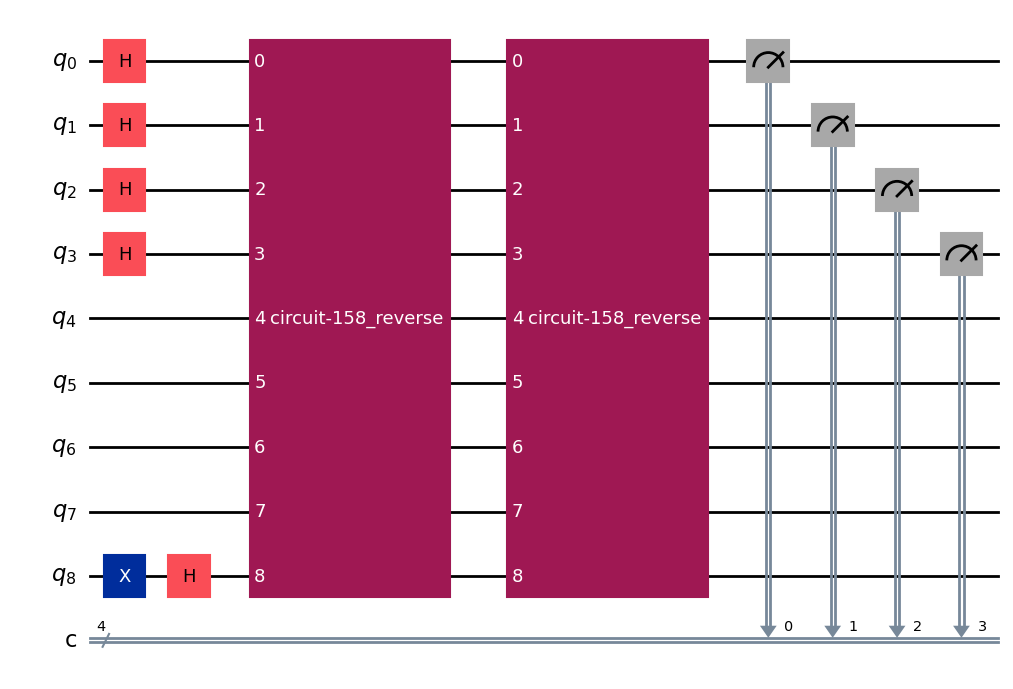

In [3]:
n = nodes * colors
m = 2
# Grover Search

grover_search = grover_search(oracle, m, n)
grover_search.draw(output='mpl')


Now we are ready to simulate the algorithm and plot the results

c:\Users\MATIAS\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit\providers\fake_provider\generic_backend_v2.py:500: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


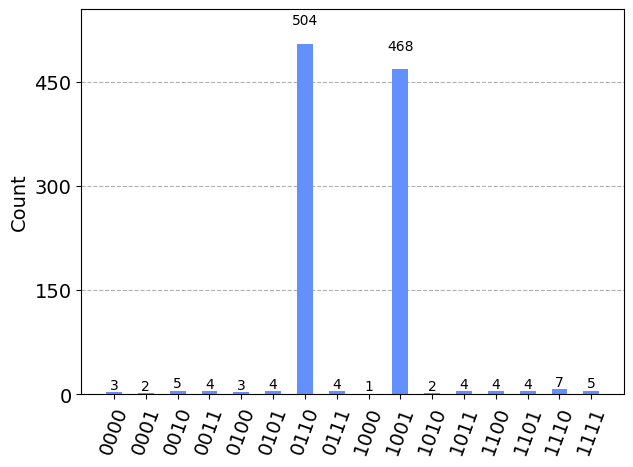

In [4]:
simulator_backend = GenericBackendV2(num_qubits=oracle.num_qubits)
circuit = transpile(grover_search, backend=simulator_backend)
job2 = simulator_backend.run(circuit, shots = 1024)
result = job2.result()
counts = result.get_counts(circuit)
plot_histogram(counts)